In [10]:
from scipy.stats import binom
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

Assignment 1
==

In [ ]:
# Same exam SMP E-2017

Assignment 2
==

In [6]:
# a)

Total = 25+17+18+10+6+16+4+8+17+15+18+11+13+6+10+20
P_S12_given_A12 = 25/(25+6+17+13)
print("P(S12|A12) = {:.3f}" .format(P_S12_given_A12))

P(S12|A12) = 0.410


In [14]:
# b)
alpha = 0.01
obs = np.array([
    [25, 6, 17, 13],
    [17,16, 15, 6],
    [18, 4, 18, 10],
    [10, 8, 11, 20]
    
])
stat, pvalue, dof, ex = stats.chi2_contingency(obs, correction=True)

if pvalue < alpha:
    print("Reject since p-value = " + repr(round(pvalue, 4)) + ' < ' + repr(alpha))
else:
    print("Fail to reject since p-value = " + repr(round(pvalue, 4)) + ' > ' + repr(alpha))
print(obs)
print('--------')
print (ex.astype(int))

Reject since p-value = 0.0024 < 0.01
[[25  6 17 13]
 [17 16 15  6]
 [18  4 18 10]
 [10  8 11 20]]
--------
[[19  9 17 13]
 [17  8 15 12]
 [16  7 14 11]
 [16  7 13 11]]


In [4]:
# c)
P_S12_given_Aother = 10/(10+8+11+20)
print("P(S12|Aother) = {:.3f}" .format(P_S12_given_Aother))

P(S12|Aother) = 0.204


In [5]:
# d)
P_A12_or_S12 = ((25+6+17+13)+(25+17+18+10)-25)/Total
print("P(A12 or S12') = {:.3f}" .format(P_A12_or_S12))

P(A12 or S12') = 0.495


Assignment 3
==

In [24]:
# a)

L1 = [17, 16, 21, 14, 18, 24, 16, 14, 21, 23, 13, 18]
L2 = [18, 14, 19, 11, 23, 21, 10, 13, 19, 24, 15, 20]

mean1 = np.mean(L1)
std1 = np.std(L1, ddof = 1)
L1q3, L1q1 = np.percentile(L1, [75,25])
iqr1 = L1q3 - L1q1

print("Mean L1 =", round(mean1, 2),   '   Std1 =', round(std1, 2),    '    IQR1 =', round(iqr1, 2))

mean2 = np.mean(L2)
std2 = np.std(L2, ddof = 1)
L2q3, L2q1 = np.percentile(L2, [75,25])
iqr2 = L2q3 - L2q1

print("Mean L2 =", round(mean2, 2),   '   Std2 =', round(std2, 2),    '    IQR2 =', round(iqr2, 2))

Mean L1 = 17.92    Std1 = 3.63     IQR1 = 5.5
Mean L2 = 17.25    Std2 = 4.59     IQR2 = 6.5


In [27]:
# b)
# This could technically be done in two ways: Setup two distinct CIs or setup one CI on the difference in means.
# Here, I'll just setup two CIs

n1 = len(L1)
SE1 = stats.sem(L1)
Level = 0.95

CI1 = stats.t.interval(Level, n1-1, loc=mean1, scale=SE1)

print('A ' + repr(Level*100) + ' % confidence interval for the sample mean is [' + repr(round(CI1[0],3)) + ' ; '
      + repr(round(CI1[1],3)) + ']')

n2 = len(L2)
SE2 = stats.sem(L2)
Level = 0.95

CI2 = stats.t.interval(Level, n2-1, loc=mean2, scale=SE2)

print('A ' + repr(Level*100) + ' % confidence interval for the sample mean is [' + repr(round(CI2[0],3)) + ' ; '
      + repr(round(CI2[1],3)) + ']')

# They really do not indicate anything since you would need to make a CI on the difference in means in order to
# draw any plausible conclusions.

A 95.0 % confidence interval for the sample mean is [15.611 ; 20.223]
A 95.0 % confidence interval for the sample mean is [14.331 ; 20.169]


In [28]:
# c)
val = stats.ttest_rel(L1, L2)
alpha = 0.05
pvalue = round(val[1], 4)
if pvalue < alpha:
    print("Reject since " + repr(pvalue) + ' < ' + repr(alpha))
else:
    print("Fail to reject since " + repr(pvalue) + ' > ' + repr(alpha))

Fail to reject since 0.4524 > 0.05


Assignment 4
==

In [33]:
# a) Binomial
n = 368
s = 62

# b)
p = s/n
print ("a) Binomial")
print ("b)", round(p,2))

# c)
SE = np.sqrt((p*(1-p))/n)
Level = 0.95

CI = stats.norm.interval(Level, loc=p, scale=SE)

print('c) A ' + repr(Level*100) + ' % confidence interval for the sample proportion is [' + repr(round(CI[0],4)) + ' ; '
      + repr(round(CI[1],4)) + ']')

# d)
n1 = 40
x = 0.25*n1
prob = binom.sf(x-1,n1,p)
print('d) P(X > ' + repr(int(x)) + ')' + ' = ' + repr(round(prob,4)))

a) Binomial
b) 0.17
c) A 95.0 % confidence interval for the sample proportion is [0.1302 ; 0.2067]
d) P(X > 10) = 0.1239


Assignment 5
==

In [34]:
df = pd.read_excel('C:/Users/RIB/OneDrive/Documents/Arbejde/Stochastic modeling and processes/Old/New folder/overblik/TV Viewing.XLSX', )

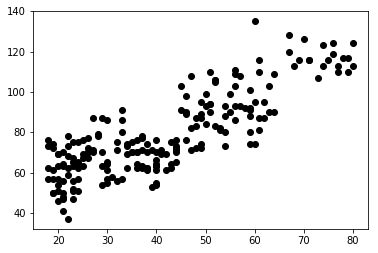

In [36]:
X = df['Age']
y = df['TV hours/week']
plt.scatter(X, y,  color='black');

In [37]:
X1 = sm.add_constant(X)
model = sm.OLS(y, X1).fit()
res = model.resid
yhat = model.fittedvalues
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TV hours/week   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     451.9
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           1.24e-53
Time:                        10:35:14   Log-Likelihood:                -791.31
No. Observations:                 206   AIC:                             1587.
Df Residuals:                     204   BIC:                             1593.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2796      2.104     17.721      0.000      33.132      41.427
Age            0.9981      0.047     21.258      0.000       0.905       1.091
==============================================================================
Omnibus:                        2.936   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.925
Skew:                           0.248   Prob(JB):                        0.232
Kurtosis:                       2.692   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

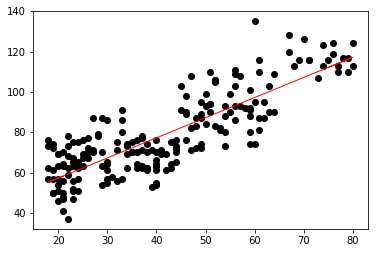

In [38]:
plt.scatter(X, y,  color='black')
plt.plot(X, yhat, color='red', linewidth=1);

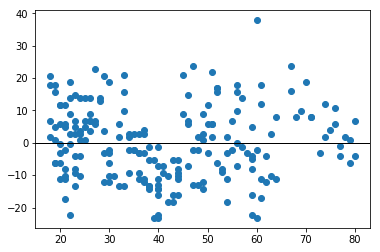

In [39]:
plt.scatter(X, res)
plt.axhline(y=0, color='k', linewidth=1)
plt.show()

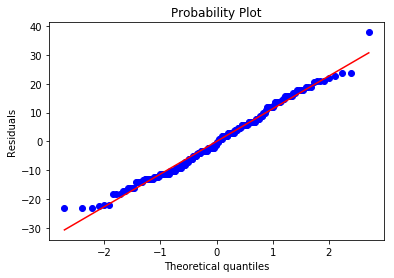

Skewness = 0.248
Kurtosis = -0.3078


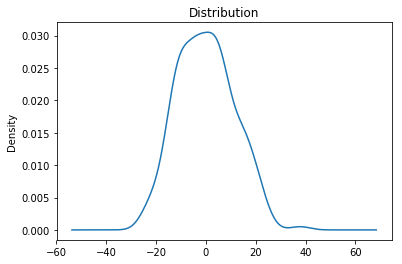

In [40]:
stats.probplot(res, plot=plt)
plt.ylabel('Residuals')
plt.show()
print('Skewness = ' + repr(round(stats.skew(res),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(res),4)))
df = pd.DataFrame(res)
fig, ax = plt.subplots()
df.plot.kde(ax=ax, legend=False, title='Distribution');